In [56]:
import numpy as np                                                 
import pandas as pd                                                
import matplotlib.pyplot as plt 

In [57]:
Retail = pd.read_csv("OnlineRetail.csv")     # Importing the Online Retail dataset using pd.read_csv
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [58]:
Retail.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [96]:
Retail.describe()

,Quantity,UnitPrice,Total_Price
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,17.987795
std,218.081158,96.759853,378.810824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.400000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A94FDC6BE0>,
      dtype=object)

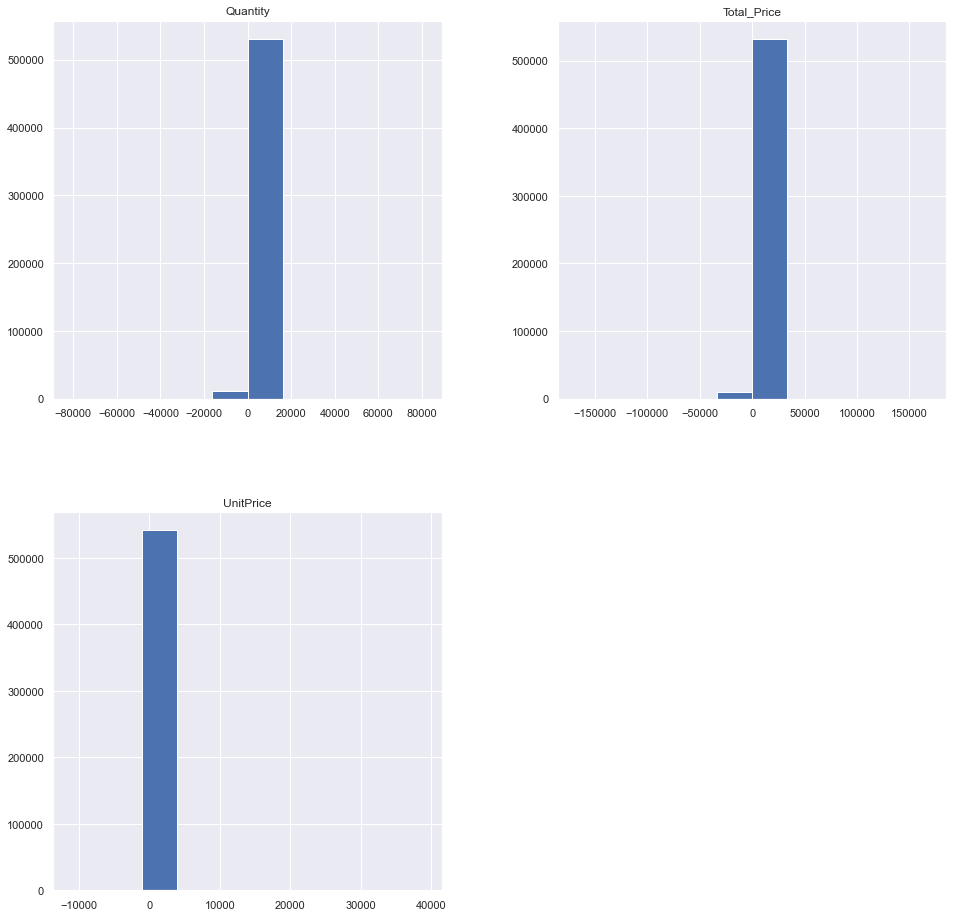

In [95]:
Retail.hist(bins=10,figsize=(16, 16))

In [ ]:
# As the above graph is contain too much data to plot so there is considerlable meaning to it

In [60]:
Region=Retail['Country'].value_counts()
Region

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [61]:
Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [62]:
Retail.drop('CustomerID', axis = 1,inplace = True) # As CustomerID have too many null values and also it is not usefull for data set

In [63]:
Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,United Kingdom


In [64]:
Retail['Total_Price']=Retail['Quantity'] * Retail['UnitPrice']
Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,France,16.60


In [65]:
CountryWise=Retail.groupby(['Country','Total_Price'])#Countrywise Sales
CountryWise.first()

InvoiceNo StockCode                      Description  \
Country     Total_Price                                                        
Australia   -425.00       C551348     22990       COTTON APRON PANTRY DESIGN   
            -262.73       C574344      POST                          POSTAGE   
            -174.00       C574019     22738        RIBBON REEL SNOWY VILLAGE   
            -107.50       C545525     22969     HOMEMADE JAM SCENTED CANDLES   
            -61.20        C545525     22697  GREEN REGENCY TEACUP AND SAUCER   
...                           ...       ...                              ...   
Unspecified  34.00         552695     22752     SET 7 BABUSHKA NESTING BOXES   
             37.20         553857    84913B            MINT GREEN ROSE TOWEL   
             44.55         578539     22138    BAKING SET 9 PIECE RETROSPOT    
             45.00         552695     22960         JAM MAKING SET WITH JARS   
             69.36         563947     23236       STORAGE TIN VINTAGE DOILY    

                         Quantity       InvoiceDate  UnitPrice  
Country     Total_Price                                         
Australia   -425.00          -100    4/28/2011 9:49       4.25  
            -262.73            -1  11-04-2011 10:18     262.73  
            -174.00          -120  11-02-2011 12:05       1.45  
            -107.50           -86  03-03-2011 13:11       1.25  
            -61.20            -24  03-03-2011 13:11       2.55  
...                           ...               ...        ...  
Unspecified  34.00              4  05-10-2011 15:31       8.50  
             37.20              8   5/19/2011 13:30       4.65  
             44.55              9  11/24/2011 14:55       4.95  
             45.00             12  05-10-2011 15:31       3.75  
             69.36             24   8/22/2011 10:18       2.89  

[12498 rows x 6 columns]

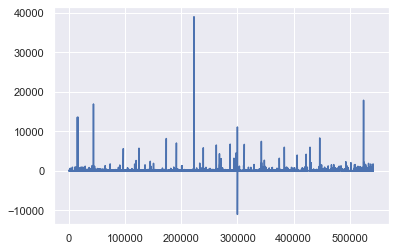

In [66]:
plt.plot("UnitPrice",data=Retail)

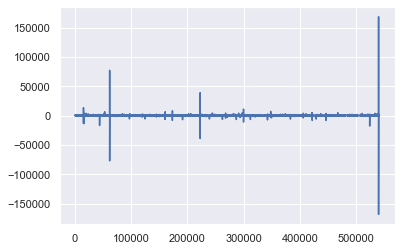

In [53]:
plt.plot("Total_Price",data=Retail)

In [84]:
SortQuantity1=Retail.groupby("Country").agg({
    "Quantity" : "sum"
}).sort_values('Quantity',ascending=False)[:10]

SortQuantity1.head(10)

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


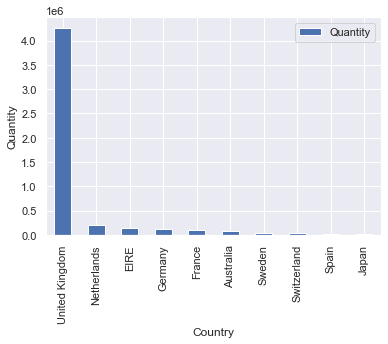

In [85]:
SortQuantity1.plot(kind ="bar")
plt.ylabel("Quantity")
plt.show()

In [86]:
SortQuantity2=Retail.groupby("Country").agg({
    "Total_Price" : "sum"
}).sort_values('Total_Price',ascending=False)[:10]

SortQuantity2.head(10)

,Total_Price
Country,
United Kingdom,8.187806e+06
Netherlands,2.846615e+05
EIRE,2.632768e+05
Germany,2.216982e+05
France,1.974039e+05
Australia,1.370773e+05
Switzerland,5.638535e+04
Spain,5.477458e+04
Belgium,4.091096e+04


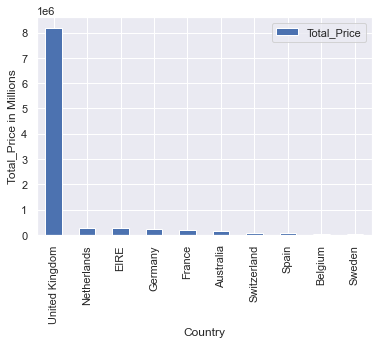

In [87]:
SortQuantity2.plot(kind ="bar")
plt.ylabel("Total_Price in Millions")
plt.show()

In [ ]:
# As we can see in above graph stats for united kingdom are too dominent so for clear idea of other countries we will remove UK stats

In [79]:
New_Retail=Retail[Retail.Country!="United Kingdom"]
New_Retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Total_Price
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12-01-2010 08:45,3.75,France,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12-01-2010 08:45,3.75,France,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12-01-2010 08:45,3.75,France,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12-01-2010 08:45,0.85,France,10.2
30,536370,21883,STARS GIFT TAPE,24,12-01-2010 08:45,0.65,France,15.6


In [89]:
SortQuantityNew1=New_Retail.groupby("Country").agg({
    "Quantity" : "sum"
}).sort_values('Quantity',ascending=False)[:10]

SortQuantityNew1.head(10)

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


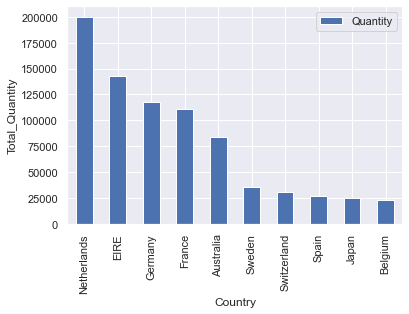

In [90]:
SortQuantityNew1.plot(kind ="bar")
plt.ylabel("Total_Quantity")
plt.show()
# From below graph we can tell that Europian Country have lot more Quantity Value than other Countries

In [92]:
SortQuantityNew2=New_Retail.groupby("Country").agg({
    "Total_Price" : "sum"
}).sort_values('Total_Price',ascending=False)[:10]

SortQuantityNew2.head(10)

,Total_Price
Country,
Netherlands,284661.54
EIRE,263276.82
Germany,221698.21
France,197403.90
Australia,137077.27
Switzerland,56385.35
Spain,54774.58
Belgium,40910.96
Sweden,36595.91


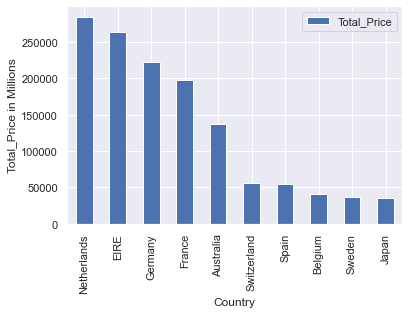

In [94]:
SortQuantityNew2.plot(kind ="bar")
plt.ylabel("Total_Price in Millions")
plt.show()

In [ ]:
# We can see in the above plot that it is not identical in  order to plot of Quantity 
# So the Total Price is also much dependent on UnitPrice 